<h1 style="color:rgb(0,120,170)">Assignment 5: Ensemble Methods</h1>

<h2 style="color:rgb(0,120,170)">Copyrighting and Fare Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requiers you, as a student, to submit notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.<br>
Within the notebook we provide detailed instruction which you may want to follow, in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where evry part of the name strats from capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k), 8 digits</li>
</ol>

Adding cells might badly influence your sumbission, in case if implementations in cells will depend on unexpected ones.
You may notice, that most cells are tagged, that is the way for unittest routine to recognise them.
We highly recommend you to develop your code within provided cells.

**If you delete any cell or tag**, it will be hard to evaluate respective part of assingment.

**Please be careful**, and may force be with you.

<h2 style="color:rgb(0,120,170)">Task 1: AdaBoostM1 is an instance of forward stagewise modelling</h2>


In the lecture it was mentioned that one of the first boosting algorithms, i.e. AdaBoostM1, is equivalent to forward stagewise modeling using the exponential loss $L(y,g(\mathbf{x}))=\exp(-yg(\mathbf{x}))$ for a binary classification problem. In this task we intend to provide a proof of this fact. We will guide you through the most important steps and you will have to add some details.

For AdaBoostM1, the basis functions at timestep $n$ are the individual classifiers $b_n(\mathbf{x}) \in \left\{ -1,1 \right\}$. We assume that all of them are slightly better than random guessing. Note that we use $b_n$ here for the resulting classifier at timestep $n$, which differs slightly from the notation in the slides, mainly to not confuse it with the corresponding approximation from forward stagewise modelling, which is also called $g_n$ there. 

Using the exponential loss in each timestep $n$ we have to solve 
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l \exp(-y_i(g_{n-1}(\mathbf{x}_i)+\beta b(\mathbf{x}_i)),$$ for the classifier $b_n$ and the coefficient $\beta_n$ which are added at each step. This can be rewritten as
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i)), \qquad (1)$$ with $w_i^{(n)}=\exp(-y_i g_{n-1}(\mathbf{x}_i))$. Since each $w^{(n)}_i$ depends neither on $\beta$ nor $b$, it can be regarded as a weight that is applied to each observation. This weight depends on $g_{n−1}(\mathbf{x}_i)$, and so the individual weight values change with each iteration $n$. The solution of (1) can be found in two steps:

<h3 style="color:rgb(210,90,80)">Calculation 1 (10 points):</h3>

In the **first step** fix $\beta \geq 0$ and show that in this case the solution to (1) is $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$. Hints:<ol>
<li>Try to write the expressions in (1) after $\arg \min$ in the form $\sum_{b(\mathbf{x}_i)=y_i}(...)+\sum_{b(\mathbf{x}_i)\ne y_i}(...)$. <br>Find the right expressions for (...), such that the product $b(\mathbf{x}_i)y_i$ doesn't appear there anymore.<br><br>
<li>Now show that this can be written as <br>$(\exp(\beta)-\exp(-\beta))\sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}.\qquad (2)$ <br>The equation $\sum_{i} w_i^{(n)} = \sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)} + \sum_{b(\mathbf{x}_i)= y_i}w_i^{(n)}$ might be helpful.<br><br>    
<li>Argue why this already implies the claim.


*Provide your **first step** calculation here*
<ol>
    <li> Hint 1 ...</li>
    <li> Hint 2 ...</li>
    <li> Hint 3 ...</li>
</ol>

When $\beta \geq 0$
- $b(x_i) = y_i \implies -y_i \beta b(\mathbf{x}_i) = -\beta$
- $b(x_i) \neq y_i \implies -y_i \beta b(\mathbf{x}_i) = \beta$

<br>

So:

$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i)) =$$

$$\arg \min_{\beta,b} \sum_{b(x_i)=y_i}w_i^{(n)}  \exp(-\beta) + \sum_{b(x_i)\neq y_i}w_i^{(n)} \exp(\beta) = $$

$$\arg \min_{\beta,b} \exp(-\beta)\sum_{b(x_i)=y_i}w_i^{(n)} + \exp(\beta)\sum_{b(x_i)\neq y_i}w_i^{(n)} = $$

$$\arg \min_{\beta,b} \exp(-\beta)\Big(\sum_{i=1}^l w_i^{(n)} - \sum_{b(x_i)\neq y_i}w_i^{(n)}\Big) + \exp(\beta)\sum_{b(x_i)\neq y_i}w_i^{(n)} = $$

$$\arg \min_{\beta,b}  \exp(\beta)\sum_{b(x_i)\neq y_i}w_i^{(n)} - \exp(-\beta) \sum_{b(x_i)\neq y_i}w_i^{(n)} + \exp(-\beta)\sum_{i=1}^l w_i^{(n)}= $$

$$\arg \min_{\beta,b} (\exp(\beta) - \exp(-\beta))\sum_{b(x_i)\neq y_i}w_i^{(n)} + \exp(-\beta)\sum_{i=1}^l w_i^{(n)}$$

<br>

The term $\exp(-\beta)\sum_{i=1}^l w_i^{(n)}$ is independent of $b$

$\exp(\beta) > \exp(-\beta)$ as a result $(\exp(\beta) - \exp(-\beta))$ is a positive constant

$\sum_{b(x_i)\neq y_i}w_i^{(n)}$ can be written as: $\sum_{i=1}^l w_i^{(n)} I(y_i\neq b(x_i))$

<br>

<h3 style="color:rgb(210,90,80)">Calculation 2 (20 points):</h3>


In the **second step** you need to optimize the following expression with respect to $\beta$:$$(\exp(\beta)-\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}$$ Hint: do it in the usual way (i.e. by differentiating the expression and setting it to $0$). <br><br>
Using the abbreviation $\text{err}_n= \frac{\sum_{i=1}^l w_i^{(n)} I(y_i \ne b_n(\mathbf{x}_i))}{\sum_{i=1}^l w_i^{(n)}}$ show that the obtained expression is $\beta_n=\frac12 \ln \frac{1-\text{err}_n}{\text{err}_n}$. <br>
Note that $\beta_n \geq 0$, by our assumption that all classifiers are better than random guessing, i.e. $\text{err}_n \le \frac12$, so the result is in accordance with the previous subtask.

*Provide your **second step** calculation here*

<ol>
    <li> Derivate ...</li>
    <li> Using given abbreviation show ...</li>
</ol>
$$(\exp(\beta) - \exp(-\beta))\sum_{b(x_i)\neq y_i}w_i^{(n)} + \exp(-\beta)\sum_{i=1}^l w_i^{(n)} = 0$$

<br>

Dividing the whole equation by $-exp(-\beta)$ results in:

$$\Big(\frac{\exp(\beta)}{\exp(-\beta)} + 1\Big)\sum_{b(x_i)\neq y_i}w_i^{(n)} = \sum_{i=1}^l w_i^{(n)} $$

$$(\exp(2\beta) + 1)\sum_{b(x_i)\neq y_i}w_i^{(n)} = \sum_{i=1}^l w_i^{(n)} $$

<br>

Dividing the whole equation by $\sum_{b(x_i)\neq y_i}w_i^{(n)}$ results in:

$$\exp(2\beta) + 1 = \frac{\sum_{i=1}^l w_i^{(n)}}{\sum_{b(x_i)\neq y_i}w_i^{(n)}}$$

$$\exp(2\beta) = \frac{\sum_{i=1}^l w_i^{(n)}}{\sum_{b(x_i)\neq y_i}w_i^{(n)}} - 1$$

<br>

By incorporating the indicator function we get:

$$\exp(2\beta) = \frac{\sum_{i=1}^l w_i^{(n)}}{\sum_{i=1}^l w_i^{(n)} I(y_i\neq b_n(x_i))} - 1$$

<br>

We can see that $\frac{\sum_{i=1}^l w_i^{(n)}}{\sum_{i=1}^l w_i^{(n)} I(y_i\neq b_n(x_i))} = err_n^{-1}$, therefore:

$$\exp(2\beta) = err_n^{-1} - 1$$

$$\exp(2\beta) = \frac{1}{err_n} - 1$$

$$\exp(2\beta) = \frac{1 - err_n}{err_n}$$

$$\beta_n = \frac{1}{2}\ln\frac{1 - err_n}{err_n}$$

<br>

<h3 style="color:rgb(210,90,80)">Calculation 3 (10 points):</h3>

In the **final step** we can update the approximation as follows: $g_n(\mathbf{x})=g_{n-1}(\mathbf{x})+\beta_n b_n(\mathbf{x})$. To finish the proof proceed by deriving the following relations:
<ol>
    <li>The weights for the next generation can be computed as follows: $w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}))$.</li>
    <li>$-y_i b_n(\mathbf{x})=2I(y_i \ne b_n(\mathbf{x}_i))-1$</li>
    <li>Use these two relations to show that: $$w_i^{(n+1)}=w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i))) \qquad (2)$$ where $\alpha_n=2\beta_n$ is the $\alpha_n$ from the AdaBoostM1 algorithm from the lecture.</li>
</ol>

*Provide your **final step** calculation here*

<ol>
    <li> Calculate weights ...</li>
    <li> ... </li>
    <li> ... </li>
    
</ol>

$$w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x_i})) =$$

<br>
$-y_i b_n(\mathbf{x})=2I(y_i \ne b_n(\mathbf{x}_i))-1\space$, therefore:

$$w_i^{(n+1)}=w_i^{(n)} \exp(\beta_n(2I(y_i \ne b_n(\mathbf{x}_i))-1)) =$$

$$w_i^{(n+1)}=w_i^{(n)} \exp(2\beta_nI(y_i \ne b_n(\mathbf{x}_i))-\beta_n) =$$

$$w_i^{(n+1)}=w_i^{(n)} \exp(2\beta_nI(y_i \ne b_n(\mathbf{x}_i))) exp(-\beta_n) =$$

<br>

$\alpha_n=2\beta_n\space$, therefore:

$$w_i^{(n+1)}=w_i^{(n)}\exp(-\beta_n)\exp(\alpha_nI(y_i \ne b_n(\mathbf{x}_i)))$$

<br>


<h2 style="color:rgb(0,120,170)">Task 2: Random Forests and Feature importance</h2>

In this task you will train a Random Forest (RF) Classifier on a subset of fashionMNIST. You should observe how these models can immediately give you useful information about feature importance, which is a very convenient property of RFs. 

First you should re-use the given code from the previous assignment to load the whole data set (the procedure is completely analogous).

* Next implement code that filters the data set for the classes with labels 1 (trousers) and 9 (ankle boots).You should create the filtered train data set from x_train and y_train and the test data set from x_test and y_test. <br>**Hint**: Masks provide a convenient solution to this task. 
* After the filtering procedure the data samples corresponding to trousers should be labeled as 0 and the ankle boots as 1. Perform this step on the test and train data set.
* To accomplish this task implement a function **\_filter\_()**.

<h3 style="color:rgb(210,90,80)">Code 1 (15 points):</h3>

In [1]:
#NOTE#######################################################################################################
#From now on, please add all your imports in this cell
############################################################################################################

#Nothing to do here
import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
# Set random seed to ensure reproducible runs
RSEED = 10

In [2]:
#Load training and test data (routine from last week)
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
x_train = np.array(img_train)
y_train = np.array(labels_train)
x_test,y_test = data.load_testing()
x_test = np.array(x_test)
y_test = np.array(y_test)
print(y_train)
print(y_test)

[2 9 6 ... 8 8 7]
[0 1 2 ... 8 8 1]


In [3]:
"""Function _filter_() is created to filter datasets w.r.t to given labels
@param x_train Training feature matrix
@param y_train Training labels vector
@param x_test Test feature matrix
@param y_test Test labels vector
@param labels_list list of length 2 which consists of integer labels.

@returns a tuple (x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered). 
"""
def _filter_(x_train:np.array, 
             y_train:np.array, 
             x_test:np.array, 
             y_test:np.array, 
             labels_list:list):
    
    #Your code goes here ↓↓↓

    mask_train = np.logical_or(y_train == 1, y_train == 9)
    mask_test = np.logical_or(y_test == 1, y_test == 9)

    x_train_filtered = x_train[mask_train]
    y_train_filtered = y_train[mask_train]

    x_test_filtered = x_test[mask_test]
    y_test_filtered = y_test[mask_test]

    # Change the labels
    y_train_filtered[y_train_filtered == 1], y_train_filtered[y_train_filtered == 9] = 0, 1
    y_test_filtered[y_test_filtered == 1], y_test_filtered[y_test_filtered == 9] = 0, 1
    
    #Your code ends here _____________________________________________________________________________________
    
    return (x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered)

In [4]:
#NOTHING TO CHANGE HERE
x_train, y_train, x_test, y_test = _filter_(x_train, y_train, x_test, y_test, [1,9])
print(y_train)
print(y_test)

[1 1 1 ... 1 1 0]
[0 0 0 ... 1 1 0]


In the following we visualize a few randomly selected samples from our training data:

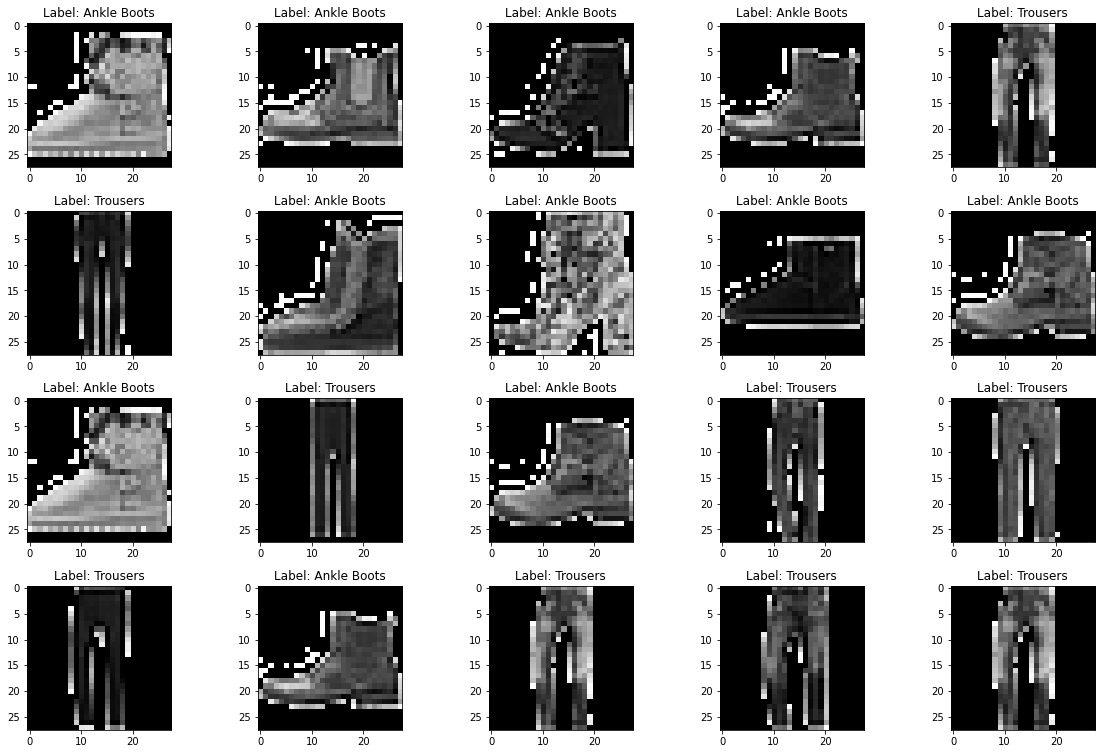

In [5]:
#A routine that you can use for plotting some of the data. 
arr = ['Trousers','Ankle Boots']
a = np.random.randint(1,40,20)
plt.figure(figsize=(20, 13))
for n,i in enumerate(a):
    plt.subplot(4, 5, n+1)
    two_d = (np.reshape(x_train[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[y_train[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust(hspace = 0.3)

<h3 style="color:rgb(210,90,80)">Code 2 (5 points):</h3>


Your task now is to train an sklearn RandomForestClassifier with the default parameters on the training data set. 

Then get the model's predictions for the test data set. Use **RSEED** as random_seed for the RandomForestClassifier.

For this we ask you to impletent a function fit_predict.

In [6]:
"""Function fit_predict() is created to fit RF on training data and return predictions as well as model
@param x_train Training feature matrix
@param y_train Training labels vector
@param x_test Test feature matrix
@param y_test Test labels vector
@param rseed Random Seed, integer

@returns a tuple (model, prediction). Where model is an trained RF classifier and prediction is a np array
"""
def fit_predict(x_train,y_train,x_test,y_test, rseed):
    
    #Your code goes here ↓↓↓
    model = RandomForestClassifier(random_state = RSEED)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)

    #Your code ends here _____________________________________________________________________________________
    
    return model, prediction

In [7]:
model, prediction = fit_predict(x_train,y_train,x_test,y_test, RSEED)

<h3 style="color:rgb(210,90,80)">Code 3 (15 points):</h3>

Now, within variables size_test, pred_wrong save the size of test set and number misclassified test samples.
Both variables should be integers.

Use your predictions to plot up to 20 test data sample(s) that were **missclassified**: 

In [8]:
#NUMER OF WRONG PREDICTIONS
#Your code goes here ↓↓↓
size_test = len(x_test)
y = prediction == y_test
pred_wrong = (len(y) - sum(y)) 
#Your code ends here _____________________________________________________________________________________

#Following print statement might be evaluated
print("Number of test samples: {0}\nNumber of misclassified samples: {1}".format(size_test,pred_wrong))

Number of test samples: 2000
Number of misclassified samples: 1


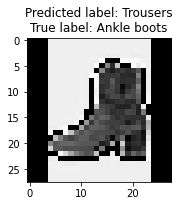

In [9]:
#PLOTTING WRONG PREDICTIONS

#Your code goes here ↓↓↓

#Use your free stlye plotting, or routine we have shown above
#No plots' variables are needed

#Your code ends here _____________________________________________________________________________________
mis_x = x_test[np.logical_not(y)]
mis_true_y = y_test[np.logical_not(y)]
mis_pre_y = prediction[np.logical_not(y)]

arr = ['Trousers','Ankle boots']
plt.figure(figsize=(20, 13))
for i, sample in enumerate(mis_x):
    plt.subplot(4, 5, i+1)
    two_d = (np.reshape(sample, (28, 28)) * 255).astype(np.uint8)
    plt.title(f"Predicted label: {arr[mis_pre_y[i]]}\n"
              f"True label: {arr[mis_true_y[i]]}")
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust(hspace = 0.3)

<h3 style="color:rgb(210,90,80)">Code 4 (20 points):</h3>

Within this part we will try to see the decision making incentives of Random Forest.

To do this we ask you to implement following tasks:
<ol>
    <li>Take your training dataset and split it into 2: trousers and boots. <br>
    Calculate average of features. Reshape averages them no 2D arrays of 28*28 and plot them as heatmaps.</li>
    <li>From average of trousers subtract average of boots. Plot it as heatmap</li>
    <li>Visualize the feature importance of previously trained RF classifier as a heatmap.<br>
    <b>Hint:</b> Check scikit-learn documentation to access feature importance.</li>
</ol>
    
The evaluation of the following code will be done by viewing your plots.<br><br>
**BONUS for those who are curious**: run RF under different seeds, look how plots are changing.<br>
BEFORE SUBMISSION RETURN TO ORIGINAL SEED = 10

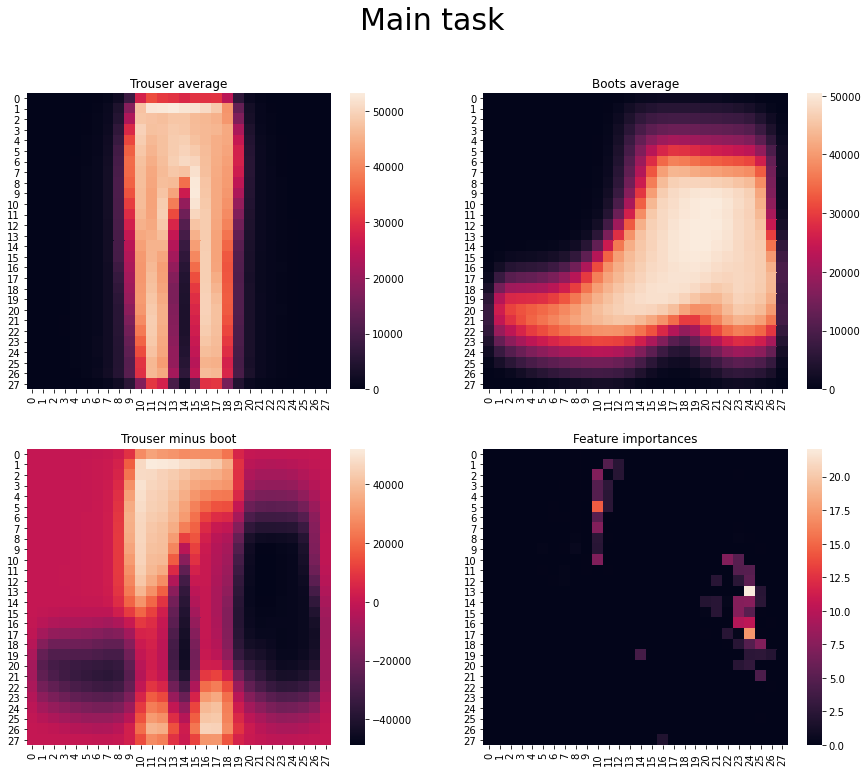

In [68]:
#PLOTTING HEATMAPS

#Your code goes here ↓↓↓

#Use your free stlye plotting
#No plots' variables are needed

#Step 1 Split and calculate averages

#Step 2 Subtract 

#Step 3 Extract feature importance

#Step 4 plot everything together

#Your code ends here _____________________________________________________________________________________

import seaborn as sb

trouser_train_indices = y_train == 0
boot_train_indices = y_train == 1

x_train_trouser = x_train[trouser_train_indices]
y_train_trouser = y_train[trouser_train_indices]

x_train_boot = x_train[boot_train_indices]
y_train_boot = y_train[boot_train_indices]

x_train_trouser_average = np.mean(x_train_trouser, axis=0)
x_train_boot_average = np.mean(x_train_boot, axis=0)


#Step 2 Subtract 
x_train_trouser_minus_boot = x_train_trouser_average - x_train_boot_average

#Step 3 Extract feature importance
importances = model.feature_importances_


# plt.figure()

fig, ax = plt.subplots(2,2,figsize=(15,12))
plt.suptitle('Main task',size=30)

two_t = (np.reshape(x_train_trouser_average, (28,28)) * 255)
sb.heatmap(two_t, ax=ax[0,0]).set(title='Trouser average')

two_b = (np.reshape(x_train_boot_average, (28,28)) * 255)
sb.heatmap(two_b, ax=ax[0,1]).set(title='Boots average')

two_bt = (np.reshape(x_train_trouser_minus_boot, (28,28)) * 255)
sb.heatmap(two_bt, ax=ax[1,0]).set(title='Trouser minus boot')

two_d = (np.reshape(importances, (28,28)) * 255)
sb.heatmap(two_d, ax=ax[1,1]).set(title='Trouser minus boot')
plt.title('Feature importances')
plt.show()


If you solved the previous task correctly, the resulting plot should look like this:
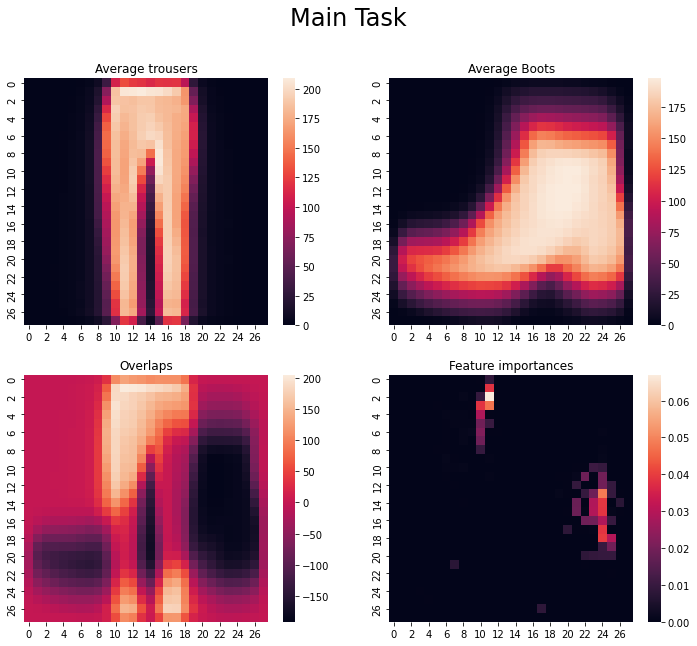

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

What observations can you make? 
<br>(Multiple answers might be correct)

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.<br>
**NOTE** Do not reuse these variable names. They are used for testing.
    
a_) RF achieves almost perfect performance. <br>
b_) The most important features are located in image regions that primarily show either only trousers or ankle boots.<br>
c_)  If one pixel would only be bright for trousers but never for ankle boots the RF classifier would certainly learn to use only this pixel as a feature.<br>
d_) Comparing the misclassified ankle boot to other ankle boot suggests that it might be an outlier in terms of background brightness.

In [ ]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
a_=True
b_=True
c_=False
d_=True

In [ ]:
def filter_tl(xt,yt,xte,yte,labels_list):
    try:
        xtf, ytf, xtef, ytef = _filter_(xt,yt,xte,yte,labels_list)
        res = (xtf.tolist(), ytf.tolist(), xtef.tolist(), ytef.tolist())
        print('Filtering works')
        return res
    except Exception as e:
        print("Execution of _filter_, or convertion from np.array to list failed")
        print(e)
        raise ValueError()
        
def model_param(xt,yt,xte,yte):
    try:
        model, pred = fit_predict(xt,yt,xte,yte,RSEED)
        nfeat = model.n_features_in_
        nclass = model.n_classes_
        print("Model is valid object")
        return nfeat,nclass
    except Exception as e:
        print("Execution of fit_predict, or model parameters extraction failed")
        print(e)
        raise ValueError()
        
def testoptions(options):
    for elem in options:
        if elem!=True and elem!=False:
            raise ValueError(f"Check answers for questions again")
    print("Test questions answers are ok")

In [ ]:
#these are dummy inputs, your code should be runnable on such
xt,yt,xte,yte = np.array([[1,1,1],[9,9,9],[5,5,5]]),np.array([1,9,5]),np.array([[0,0,0],[1,1,1],[9,9,9]]),np.array([0,1,9])

xt,yt,xte,yte = filter_tl(xt,yt,xte,yte,[1,9])
model_param(xt,yt,xte,yte)
testoptions(np.array([a_,b_,c_,d_]))
print('Executable')